In [14]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib
plt.rcParams['font.family'] = 'NanumGothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [29]:
df1 = pd.read_csv('answer1.csv')
df2 = pd.read_csv('answer2.csv')

In [30]:
df3 = pd.read_csv('info.csv', encoding='cp949')
df3[df3['문항번호코드'] == 'Q1-3']

,답항코드,문항번호코드,답항설명
29,1,Q1-3,10분 이내
30,2,Q1-3,10분~30분 이내
31,3,Q1-3,30분~1시간 이내
32,4,Q1-3,1시간 이상


In [31]:
df3[df3['문항번호코드'] =='Q1-1-1']

,답항코드,문항번호코드,답항설명
9,1,Q1-1-1,시간이 없어서
10,2,Q1-1-1,교통수단이 적절치 않아서
11,3,Q1-1-1,자연환경이 오염되어 있어서
12,4,Q1-1-1,사람이 너무 많아 혼잡하여
13,5,Q1-1-1,경제적으로 여유가 없어서
14,6,Q1-1-1,위험하고 번거로워서
15,7,Q1-1-1,갈 곳에 대한 정보가 부족해서
16,8,Q1-1-1,가족 중 어린아이가 있어서
17,9,Q1-1-1,휴양질서가 문란하여
18,10,Q1-1-1,갈 만한 곳이 없어서


In [32]:
temp_frequency = []

new_df1 = df1[df1['문항번호코드'] == 'Q1-1-1']
new_df1['답항코드'] = new_df1['답항코드'].astype(int)

new_df2 = df2[df2['문항번호코드'] == 'Q1-1-1']
new_df2['답항코드'] = new_df2['답항코드'].astype(int)

for i in new_df1['답항코드'].value_counts().index:
    temp = len(new_df1[new_df1['답항코드'] == i]) + len(new_df2[new_df2['답항코드'] == i])
    temp_frequency.append(temp)

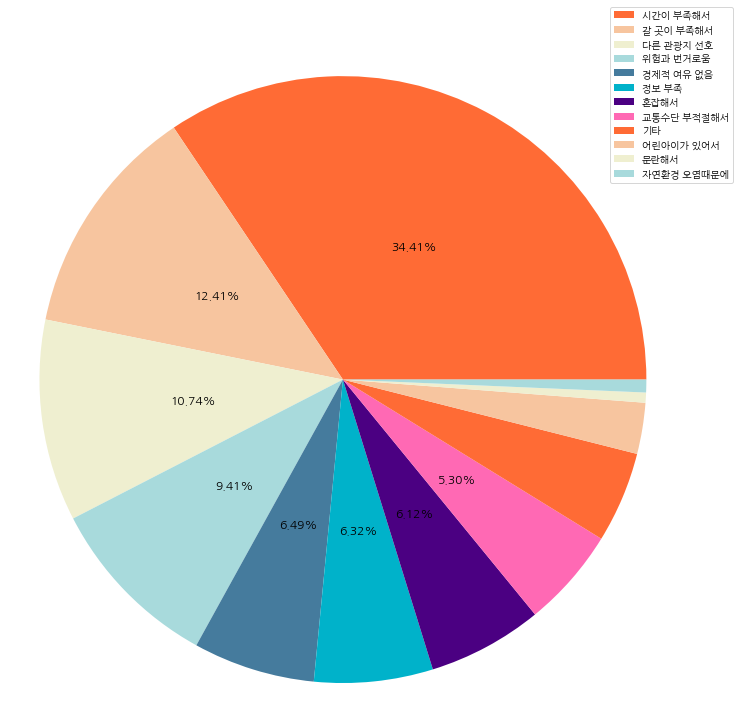

In [33]:
fig = plt.figure(figsize=(12,12)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성

frequency= temp_frequency
total = np.sum(frequency) ## 빈도수 합

labels= ['시간이 부족해서', '갈 곳이 부족해서','다른 관광지 선호','위험과 번거로움','경제적 여유 없음','정보 부족','혼잡해서','교통수단 부적절해서','기타','어린아이가 있어서','문란해서','자연환경 오염때문에'] # 라벨
colors = ['#FF6B35','#F7C59F','#EFEFD0','#A8DADC','#457B9D','#00B2CA', 'indigo', 'hotpink']
# colors = sns.color_palette('hls',len(labels)) # 라벨의 개수 만큼 색상 리스트 생성
pie = plt.pie(frequency, colors=colors) # 파이차트 그리기

threshold = 5 ## 상한선 비율
sum_pct = 0 ## 퍼센티지

bbox_props = dict(boxstyle='square',fc='w',ec='w',alpha=0) ## annotation 박스 스타일

## annotation 설정
config = dict(arrowprops=dict(arrowstyle='-'),bbox=bbox_props,va='center')
 
for i,l in enumerate(labels):
    ang1, ang2 = ax.patches[i].theta1, ax.patches[i].theta2 ## 파이의 시작 각도와 끝 각도
    center, r = ax.patches[i].center, ax.patches[i].r ## 원의 중심 좌표와 반지름길이
    
    if i < len(labels) - 1:
        sum_pct += float(f'{frequency[i]/total*100:.2f}')
        text = f'{frequency[i]/total*100:.2f}%'
    else: ## 마지막 파이 조각은 퍼센티지의 합이 100이 되도록 비율을 조절
        text = f'{100-sum_pct:.2f}%'
    
    ## 비율 상한선보다 작은 것들은 Annotation으로 만든다.
    if frequency[i]/total*100 < threshold:
#         ang = (ang1+ang2)/2 ## 중심각
#         x = np.cos(np.deg2rad(ang)) ## Annotation의 끝점에 해당하는 x좌표
#         y = np.sin(np.deg2rad(ang)) ## Annotation의 끝점에 해당하는 y좌표
        
#         ## x좌표가 양수이면 즉 y축을 중심으로 오른쪽에 있으면 왼쪽 정렬
#         ## x좌표가 음수이면 즉 y축을 중심으로 왼쪽에 있으면 오른쪽 정렬
#         horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
#         connectionstyle = "angle,angleA=0,angleB={}".format(ang) ## 시작점과 끝점 연결 스타일
#         config["arrowprops"].update({"connectionstyle": connectionstyle}) ## 
#         ax.annotate(text, xy=(x, y), xytext=(1.5*x, 1.2*y),
#                     horizontalalignment=horizontalalignment, **config)
        continue
    else:
        x = (r/2)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] ## 텍스트 x좌표
        y = (r/2)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] ## 텍스트 y좌표
        ax.text(x,y,text,ha='center',va='center',fontsize=12)

plt.legend(pie[0], labels, loc=(0.9,0.8)) # 범례만들기


plt.axis('equal')
plt.savefig('st1.jpg')
plt.show()

In [34]:
temp_frequency = []

new_df1 = df1[df1['문항번호코드'] == 'Q1-3']
new_df1['답항코드'] = new_df1['답항코드'].astype(int)

new_df2 = df2[df2['문항번호코드'] == 'Q1-3']
new_df2['답항코드'] = new_df2['답항코드'].astype(int)

for i in new_df1['답항코드'].value_counts().index:
    temp = len(new_df1[new_df1['답항코드'] == i]) + len(new_df2[new_df2['답항코드'] == i])
    temp_frequency.append(temp)

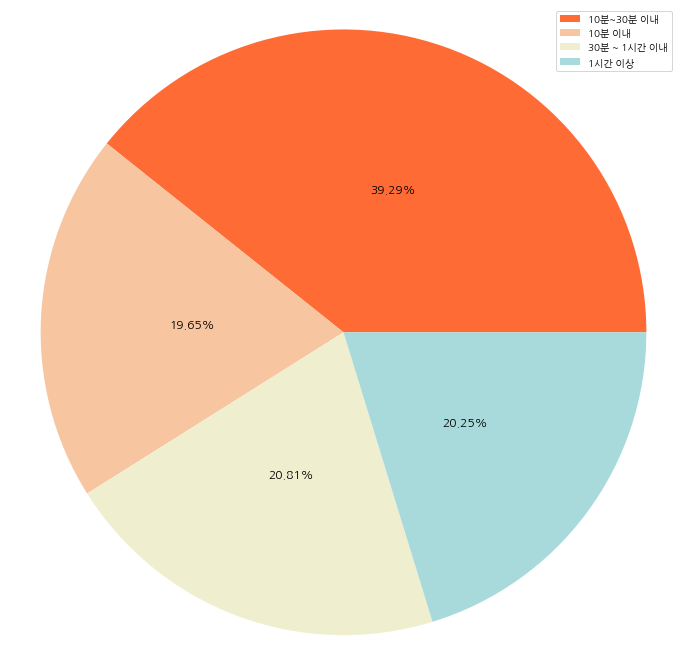

In [35]:
fig = plt.figure(figsize=(12,12)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성


frequency= temp_frequency
total = np.sum(frequency) ## 빈도수 합

labels= ['10분~30분 이내', '10분 이내', '30분 ~ 1시간 이내', '1시간 이상']
colors = ['#FF6B35','#F7C59F','#EFEFD0','#A8DADC','#457B9D','#00B2CA', 'indigo', 'hotpink']
pie = plt.pie(frequency, colors=colors) # 파이차트 그리기

threshold = 5 ## 상한선 비율
sum_pct = 0 ## 퍼센티지

bbox_props = dict(boxstyle='square',fc='w',ec='w',alpha=0) ## annotation 박스 스타일

## annotation 설정
config = dict(arrowprops=dict(arrowstyle='-'),bbox=bbox_props,va='center')
 
for i,l in enumerate(labels):
    ang1, ang2 = ax.patches[i].theta1, ax.patches[i].theta2 ## 파이의 시작 각도와 끝 각도
    center, r = ax.patches[i].center, ax.patches[i].r ## 원의 중심 좌표와 반지름길이
    
    if i < len(labels) - 1:
        sum_pct += float(f'{frequency[i]/total*100:.2f}')
        text = f'{frequency[i]/total*100:.2f}%'
    else: ## 마지막 파이 조각은 퍼센티지의 합이 100이 되도록 비율을 조절
        text = f'{100-sum_pct:.2f}%'
    
    ## 비율 상한선보다 작은 것들은 Annotation으로 만든다.
    if frequency[i]/total*100 < threshold:
#         ang = (ang1+ang2)/2 ## 중심각
#         x = np.cos(np.deg2rad(ang)) ## Annotation의 끝점에 해당하는 x좌표
#         y = np.sin(np.deg2rad(ang)) ## Annotation의 끝점에 해당하는 y좌표
        
#         ## x좌표가 양수이면 즉 y축을 중심으로 오른쪽에 있으면 왼쪽 정렬
#         ## x좌표가 음수이면 즉 y축을 중심으로 왼쪽에 있으면 오른쪽 정렬
#         horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
#         connectionstyle = "angle,angleA=0,angleB={}".format(ang) ## 시작점과 끝점 연결 스타일
#         config["arrowprops"].update({"connectionstyle": connectionstyle}) ## 
#         ax.annotate(text, xy=(x, y), xytext=(1.5*x, 1.2*y),
#                     horizontalalignment=horizontalalignment, **config)
        continue
    else:
        x = (r/2)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] ## 텍스트 x좌표
        y = (r/2)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] ## 텍스트 y좌표
        ax.text(x,y,text,ha='center',va='center',fontsize=12)

plt.legend(pie[0], labels, loc='upper right') # 범례만들기


plt.axis('equal')
plt.savefig('st2.jpg')
plt.show()

In [36]:
temp_frequency2 = []

new_df1 = df1[df1['문항번호코드'] == 'Q1-2']
new_df1['답항코드'] = new_df1['답항코드'].astype(int)

new_df2 = df2[df2['문항번호코드'] == 'Q1-2']
new_df2['답항코드'] = new_df2['답항코드'].astype(int)

for i in new_df1['답항코드'].value_counts().index:
    temp = len(new_df1[new_df1['답항코드'] == i]) + len(new_df2[new_df2['답항코드'] == i])
    temp_frequency2.append(temp)

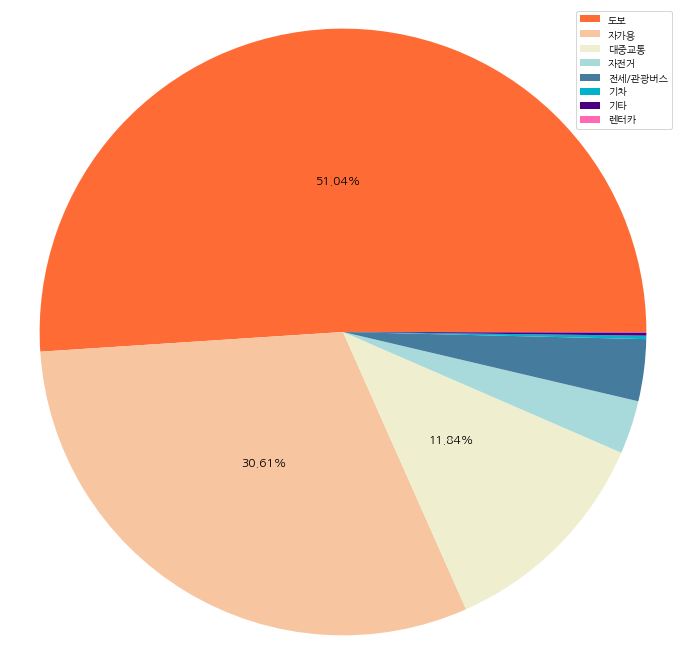

In [37]:
fig = plt.figure(figsize=(12,12)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성


frequency= temp_frequency2
total = np.sum(frequency) ## 빈도수 합

labels= ['도보', '자가용', '대중교통', '자전거','전세/관광버스','기차','기타','렌터카']
colors = ['#FF6B35','#F7C59F','#EFEFD0','#A8DADC','#457B9D','#00B2CA', 'indigo', 'hotpink']
pie = plt.pie(frequency, colors=colors) # 파이차트 그리기

threshold = 5 ## 상한선 비율
sum_pct = 0 ## 퍼센티지

bbox_props = dict(boxstyle='square',fc='w',ec='w',alpha=0) ## annotation 박스 스타일

## annotation 설정
config = dict(arrowprops=dict(arrowstyle='-'),bbox=bbox_props,va='center')
 
for i,l in enumerate(labels):
    ang1, ang2 = ax.patches[i].theta1, ax.patches[i].theta2 ## 파이의 시작 각도와 끝 각도
    center, r = ax.patches[i].center, ax.patches[i].r ## 원의 중심 좌표와 반지름길이
    
    if i < len(labels) - 1:
        sum_pct += float(f'{frequency[i]/total*100:.2f}')
        text = f'{frequency[i]/total*100:.2f}%'
    else: ## 마지막 파이 조각은 퍼센티지의 합이 100이 되도록 비율을 조절
        text = f'{100-sum_pct:.2f}%'
    
    ## 비율 상한선보다 작은 것들은 Annotation으로 만든다.
    if frequency[i]/total*100 < threshold:
#         ang = (ang1+ang2)/2 ## 중심각
#         x = np.cos(np.deg2rad(ang)) ## Annotation의 끝점에 해당하는 x좌표
#         y = np.sin(np.deg2rad(ang)) ## Annotation의 끝점에 해당하는 y좌표
        
#         ## x좌표가 양수이면 즉 y축을 중심으로 오른쪽에 있으면 왼쪽 정렬
#         ## x좌표가 음수이면 즉 y축을 중심으로 왼쪽에 있으면 오른쪽 정렬
#         horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
#         connectionstyle = "angle,angleA=0,angleB={}".format(ang) ## 시작점과 끝점 연결 스타일
#         config["arrowprops"].update({"connectionstyle": connectionstyle}) ## 
#         ax.annotate(text, xy=(x, y), xytext=(1.5*x, 1.2*y),
#                     horizontalalignment=horizontalalignment, **config)
        continue
    else:
        x = (r/2)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] ## 텍스트 x좌표
        y = (r/2)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] ## 텍스트 y좌표
        ax.text(x,y,text,ha='center',va='center',fontsize=12)

plt.legend(pie[0], labels, loc='upper right') # 범례만들기


plt.axis('equal')
plt.savefig('st3.jpg')
plt.show()